In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!head notas_andes.dat

#"Nota Final Física 1"  "Nota Final Física 2"  "Nota Final Algebra Lineal"  "Nota Final Cálculo Diferencial"  "Promedio Final PGA"
4.6  4.8  3.8  4.2  4.23
3  3.7  4.4  4  3.7
4.05  3.98  4  4  4.04
5  5  4.42  5  4.69
3.60  4  3.64  3.30  4.3
4  4  3.5  3.5  4.24
3  4.5  3.4  3  3.5
3.5  3.5  3.0  3.5  3.70
4.2  3.9  4.3  3.6  3.7


In [3]:
data = np.loadtxt("notas_andes.dat")

## Clasificación

Text(0.5, 1.0, 'PGA - Mediana: 4.0')

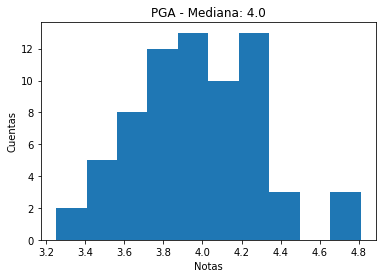

In [4]:
_ = plt.hist(data[:,4])
plt.xlabel("Notas")
plt.ylabel("Cuentas")
plt.title("PGA - Mediana: {}".format(np.median(data[:,4])))

In [5]:
#Problema de Clasificación Binario
target = np.ones(len(data))
ii = data[:,4]<4.0
target[ii] = 0
target[~ii] = 1

In [6]:
X = data[:,:4]
np.shape(X)

(69, 4)

In [7]:
import sklearn.tree

In [8]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=1)

In [9]:
?sklearn.tree.DecisionTreeClassifier

In [10]:
clf.fit(X, target)

DecisionTreeClassifier(max_depth=1)

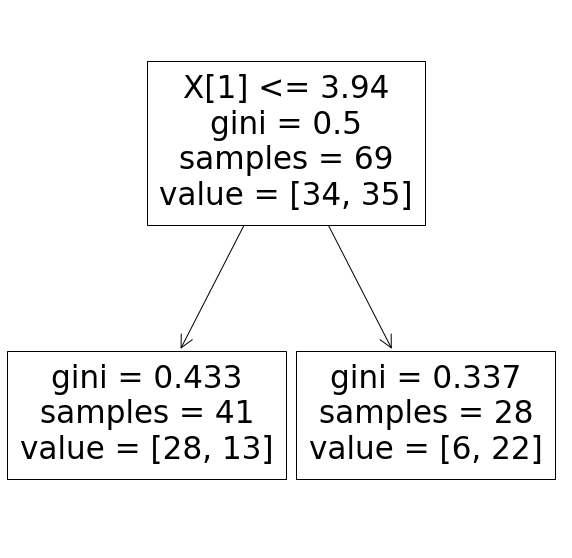

In [11]:
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [12]:
clf.predict(X)

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0.])

In [13]:
sklearn.metrics.f1_score(target, clf.predict(X))

0.6984126984126985

0.7333333333333334


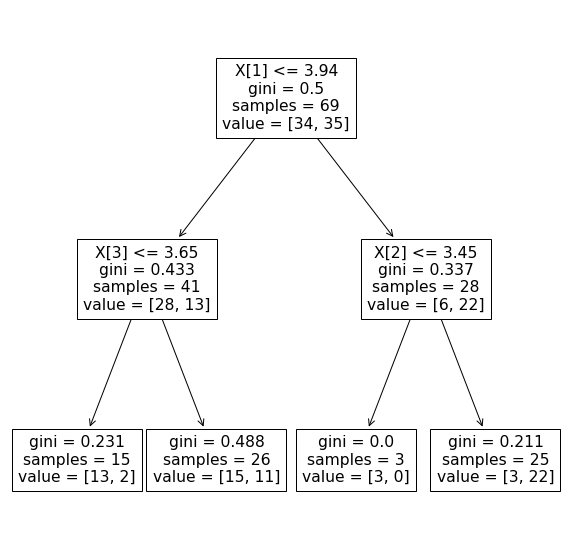

In [14]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, target)
print(sklearn.metrics.f1_score(target, clf.predict(X)))
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [15]:
clf.feature_importances_

array([0.        , 0.55984436, 0.31780616, 0.12234949])

0.7333333333333334


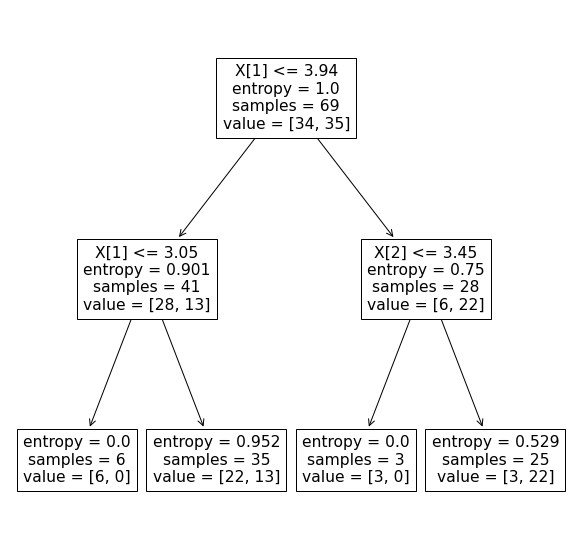

In [16]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X, target)
print(sklearn.metrics.f1_score(target, clf.predict(X)))
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [17]:
clf.feature_importances_

array([0.        , 0.65448653, 0.34551347, 0.        ])

## Regresión

In [18]:
#Problema de Clasificación Binario
target = data[:,4]

In [19]:
clf = sklearn.tree.DecisionTreeRegressor(max_depth=1)

In [20]:
clf.fit(X, target)

DecisionTreeRegressor(max_depth=1)

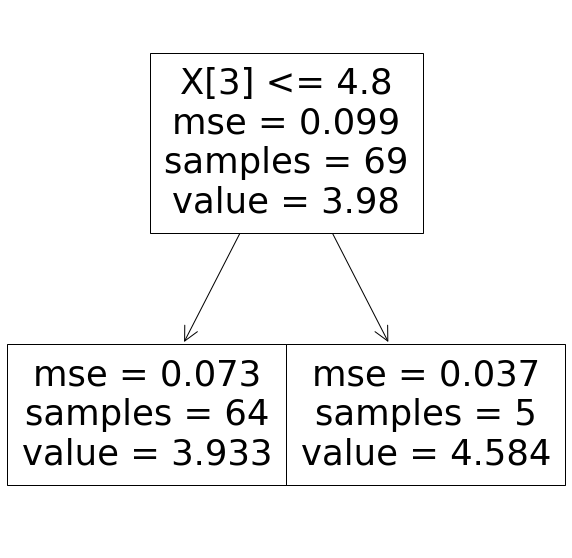

In [21]:
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [22]:
clf.predict(X)

array([3.933125, 3.933125, 3.933125, 4.584   , 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 3.933125, 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 3.933125, 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 3.933125, 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 4.584   , 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 3.933125, 3.933125, 3.933125,
       4.584   , 3.933125, 3.933125, 3.933125, 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 3.933125, 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 4.584   , 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 4.584   , 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125, 3.933125, 3.933125, 3.933125,
       3.933125, 3.933125, 3.933125])

In [23]:
sklearn.metrics.mean_squared_error(target, clf.predict(X))

0.07041586956521739

0.05238487922705314


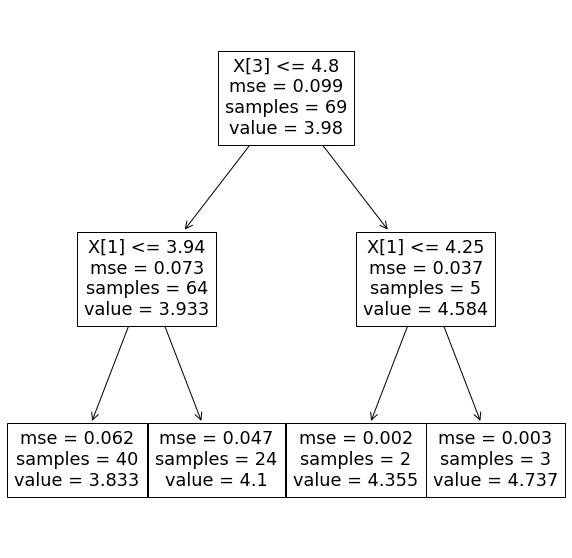

In [24]:
clf = sklearn.tree.DecisionTreeRegressor(max_depth=2)
clf.fit(X, target)
print(sklearn.metrics.mean_squared_error(target, clf.predict(X)))
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

0.04026847255160297


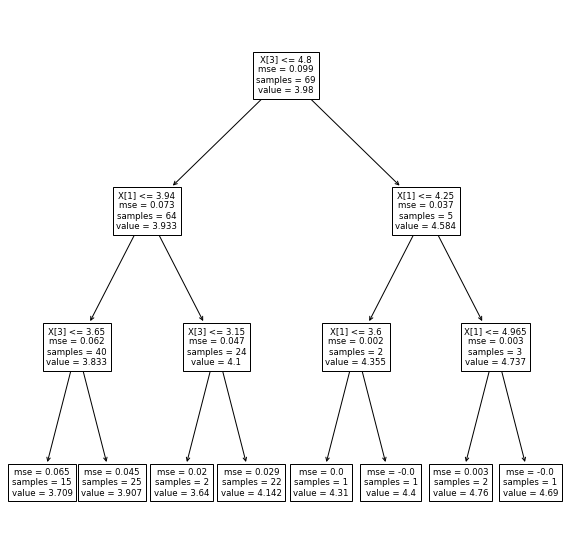

In [25]:
clf = sklearn.tree.DecisionTreeRegressor(max_depth=3)
clf.fit(X, target)
print(sklearn.metrics.mean_squared_error(target, clf.predict(X)))
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [26]:
clf.predict(np.array([[3,3,5,5]]))

array([4.31])